In [ ]:
Get model over 90%

organize some visuals 

Prepare presentation

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import multivariate_normal as mvn
from scipy.stats import multinomial as mlvn
from scipy.stats import bernoulli as brn
%matplotlib inline

In [34]:
train_data = np.load('kmnist-train-imgs.npz')['arr_0']
train_labels = np.load('kmnist-train-labels.npz')['arr_0']
test_data = np.load('kmnist-test-imgs.npz')['arr_0']
test_labels = np.load('kmnist-test-labels.npz')['arr_0']

In [35]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
test_labels.shape

(60000, 28, 28)
(60000,)
(10000, 28, 28)


(10000,)

In [36]:
x_train = train_data.reshape(-1, 784)
y_train = train_labels
x_test = test_data.reshape(-1, 784)
y_test = test_labels

In [37]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
y_test.shape

(60000, 784)
(60000,)
(10000, 784)


(10000,)

In [38]:
df_lm.to_csv(r'C:\Users\Zebfred\Enhanced_IT\local_experiment\kmnist_label_mapping.csv', index = False)

In [39]:
#new_array = np.stack(x_train, y_train)
#new_array

df_train = pd.DataFrame({'train':x_train[:,0], 'label':x_train})

df_train_labels = pd.DataFrame({'train':y_train[:,0], 'label':y_train})

df_test = pd.DataFrame({'train':x_test[:,0], 'label':x_test})

df_test_labels = pd.DataFrame({'train':y_test[:,0], 'label':y_test})

ValueError: Data must be 1-dimensional

In [40]:
df_mapping =  pd.read_csv('kmnist_classmap.csv')

In [8]:
df_mapping

,index,codepoint,char
0,0,U+304A,お
1,1,U+304D,き
2,2,U+3059,す
3,3,U+3064,つ
4,4,U+306A,な
5,5,U+306F,は
6,6,U+307E,ま
7,7,U+3084,や
8,8,U+308C,れ
9,9,U+3092,を


In [9]:
#new_array = np.stack(x_train, y_train)
#new_array

df = pd.DataFrame({'train':x_train[:,0], 'label':y_train})

In [25]:
df

,train,label
0,0,8
1,0,7
2,0,0
3,0,1
4,0,4
...,...,...
59995,0,4
59996,0,9
59997,0,0
59998,0,4


In [10]:
#new_array = np.stack(x_train, y_train)
#new_array

df_labels = pd.DataFrame({'index':y_train})

In [11]:
#new_array = np.stack(x_train, y_train)
#new_array

df_label_mapping = pd.merge(df_mapping,df_labels, how = 'left', on='index')

In [12]:
df_lm = df_label_mapping 

In [15]:
df_lm.to_csv(r'C:\Users\Zebfred\Enhanced_IT\local_experiment\kmnist_label_mapping.csv', index = False)

In [ ]:
df.to_csv(r'Path where you want to store the exported CSV file\File Name.csv', index = False)

In [ ]:
local_experiment/kmnist_classmap.csv

In [41]:
class KNNClassifier():
    
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X, K, epsilon=1e-3):
        N= len(X)
        y_hat = np.zeros(N)
        
        for i in range(N):
            dist2=np.sum((self.X-X[i])**2, axis=1)
            idxt = np.argsort(dist2)[:K]
            gamma_k = 1/(np.sqrt(dist2[idxt])+epsilon)
            y_hat[i] = np.bincount(self.y[idxt], weights=gamma_k).argmax()
            
            
            
            
            
            
        
    

In [42]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
y_test.shape

(60000, 784)
(60000,)
(10000, 784)


(10000,)

In [43]:
x_mini = x_train[0:6000]
print(x_mini.shape)
y_mini = y_train[0:6000]
print(y_mini.shape)
x_test_mini = x_test[0:6000]

(6000, 784)
(6000,)


In [89]:
knnInstance = KNNClassifier()
knnInstance.fit(x_mini,y_mini)

In [90]:
y_hat_vis = knnInstance.predict(x_test_mini, 15)

In [91]:
def accuracy(y, y_hat):
    return np.mean(y == y_hat)

print(f"Accuracy: {accuracy(y_test, y_hat_vis):0.3f}")

Accuracy: 0.000


In [22]:
#y_hat_vis = knnInstance.predict(x_test, 150)

KeyboardInterrupt: 

In [48]:
x_norm = x_train/255
x_test_norm = x_test/255

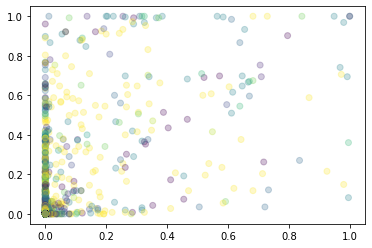

In [49]:
plt.figure()
plt.scatter(x_norm[:,0], x_norm[:,1], c = y_train, alpha = 0.25)

In [54]:
class GaussNB():
    def fit(self, X, y, epsilon = 1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        
        self.K = set(y.astype(int))
        
        for k in self.K:
            X_k = X[y == k,:]
            self.likelihoods[k] = {"mean":X_k.mean(axis=0), "cov":X_k.var(axis=0) + epsilon}
            self.priors[k] = len(X_k)/len(X)
            
    def predict(self, X):
        N, D = X.shape
        
        P_hat = np.zeros((N,len(self.K)))
        
        for k, l in self.likelihoods.items():
            P_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"]) + np.log(self.priors[k])
        return P_hat.argmax(axis = 1)

In [55]:
gnb = GaussNB()
gnb.fit(x_norm,y_train)
y_hat = gnb.predict(x_test_norm)

In [56]:
print(f"Accuracy: {accuracy(y_train, y_hat):0.3f}")

Accuracy: 0.000


<ipython-input-51-6d1f194b468d>:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  return np.mean(y == y_hat)


In [57]:
class GaussNB():
    def fit(self, X, y, epsilon = 1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        
        self.K = set(y.astype(int))
        
        for k in self.K:
            X_k = X[y == k,:]
            self.likelihoods[k] = {"mean":X_k.mean(axis=0), "cov":X_k.var(axis=0) + epsilon}
            self.priors[k] = len(X_k)/len(X)
            
    def predict(self, X):
        N, D = X.shape
        
        P_hat = np.zeros((N,len(self.K)))
        
        for k, l in self.likelihoods.items():
            P_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"]) + np.log(self.priors[k])
        return P_hat.argmax(axis = 1)

In [58]:
gnb = GaussNB()
gnb.fit(x_norm,y_train)
y_hat = gnb.predict(x_test_norm)

In [59]:
print(f"Accuracy: {accuracy(y_test, y_hat):0.3f}")

Accuracy: 0.479


In [60]:
class GaussBayes():
    def fit(self, X, y, epsilon = 1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        
        self.K = set(y.astype(int))
        
        for k in self.K:
            X_k = X[y == k,:]
            N_k, D = X_k.shape
            mu_k=X_k.mean(axis=0)
            self.likelihoods[k] = {"mean":X_k.mean(axis=0), "cov":(1/(N_k-1))*np.matmul((X_k-mu_k).T,X_k-mu_k)+ epsilon*np.identity(D)}
            self.priors[k] = len(X_k)/len(X)
            
    def predict(self, X):
        N, D = X.shape
        
        P_hat = np.zeros((N,len(self.K)))
        
        for k, l in self.likelihoods.items():
            P_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"]) + np.log(self.priors[k])
            
        return P_hat.argmax(axis = 1)

In [61]:
GB = GaussBayes()
GB.fit(x_norm,y_train)
y2_hat = GB.predict(x_test_norm)

In [62]:
print(f"Accuracy: {accuracy(y_test, y2_hat):0.3f}")

Accuracy: 0.630


In [72]:
GB = GaussBayes()
GB.fit(x_norm,y_train, epsilon=1e-1)
y6_hat = GB.predict(x_test_norm)

In [73]:
print(f"Accuracy: {accuracy(y_test, y6_hat):0.3f}")

Accuracy: 0.768


In [74]:
GB = GaussBayes()
GB.fit(x_norm,y_train, epsilon=1e1)
y7_hat = GB.predict(x_test_norm)

In [75]:
print(f"Accuracy: {accuracy(y_test, y7_hat):0.3f}")

Accuracy: 0.509


In [63]:
class GenGaussBayes():
    def fit(self, X, y, epsilon = 1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        
        self.K = set(y.astype(int))
        
        for k in self.K:
            X_k = X[y == k,:]
            N_k, D = X_k.shape
            mu_k=X_k.mean(axis=0)
            self.likelihoods[k] = {"mean":X_k.mean(axis=0), "cov":(1/(N_k-1))*np.matmul((X_k-mu_k).T,X_k-mu_k)+ epsilon*np.identity(D)}
            self.priors[k] = len(X_k)/len(X)
            
    def predict(self, X,DistFam):
        N, D = X.shape
        
        P_hat = np.zeros((N,len(self.K)))
        
        for k, l in self.likelihoods.items():
            P_hat[:,k] = DistFam(X, l["mean"], l["cov"]) + np.log(self.priors[k])
            
        return P_hat.argmax(axis = 1)

In [64]:
def DSel(dstring):
    if dstring=="Gauss" or dstring== "Gaussian" or dstring=="gauss" or dstring=="gaussian":return mvn.logpdf
    if dstring=="multi" or dstring== "Multinomial" or dstring=="multinomial" or dstring=="Multi":return mlvn.logpmf   



In [76]:

my_dist=mvn.logpdf
GGB = GenGaussBayes()
GGB.fit(x_norm,y_train, epsilon=1e-1)
y8_hat = GGB.predict(x_test_norm,DSel("gauss"))

In [77]:
print(f"Accuracy: {accuracy(y_test, y8_hat):0.3f}")

Accuracy: 0.768


In [68]:
print(f"Accuracy: {accuracy(y_test, y3_hat):0.3f}")

Accuracy: 0.630


In [ ]:

my_dist=mvn.logpdf
GGB = GenGaussBayes()
GGB.fit(x_norm,y_train)
y3_hat = GGB.predict(x_test_norm,DSel("gauss"))

In [69]:

my_dist=mvn.logpdf
GGB = GenGaussBayes()
GGB.fit(x_norm,y_train)
y4_hat = GGB.predict(x_test_norm,DSel("multi"))

ValueError: operands could not be broadcast together with shapes (10000,784) (784,784) 

In [70]:
class BernNB():
  def fit(self, X, y, epsilon = 1e-2):
    N, D = X.shape
    self.likelihoods = {}
    self.priors = {}
    self.K = set(y.astype(int))

    for k in self.K:
      X_k = X[y==k,:]
      p = (sum(X_k)+1) / (len(X_k)+2)
      self.likelihoods[k] = {'mean': p, 'cov': p * (1 - p) + epsilon}
      self.priors[k] = len(X_k)/len(X)

  def predict(self, X):
    N, D = X.shape
    P_hat = np.zeros((N, len(self.K)))

    for k,l in self.likelihoods.items():
      # Using the Bernoulli funtion/formula. Trick is to get the matrices/vectors to go from mxn to a 1x1 number for each k value.
      P_hat[:,k] = np.log(self.priors[k]) + np.matmul(X, np.log(l['mean'])) + np.matmul((1 - X), np.log(abs(1-l['mean'])))

    return P_hat.argmax(axis =1)

In [71]:

bnb = BernNB()
bnb.fit(x_norm,y_train) # Use the X and Y Training set here
yb_hat = bnb.predict(x_test_norm) # Use the X Test here
print(accuracy(y_test, yb_hat))

0.5124


In [78]:
bnb = BernNB()
bnb.fit(x_norm,y_train, epsilon= 1e-1) # Use the X and Y Training set here
yb2_hat = bnb.predict(x_test_norm) # Use the X Test here
print(accuracy(y_test, yb2_hat))

0.5124


In [79]:
bnb = BernNB()
bnb.fit(x_norm,y_train, epsilon= 1e-4) # Use the X and Y Training set here
yb2_hat = bnb.predict(x_test_norm) # Use the X Test here
print(accuracy(y_test, yb2_hat))

0.5124


In [81]:
# kNN with neighbors=4 benchmark for Kuzushiji-MNIST
# Acheives 92.10% test accuracy

from sklearn.neighbors import KNeighborsClassifier
import numpy as np



clf = KNeighborsClassifier(n_neighbors=4, weights='distance', n_jobs=-1)
print('Fitting', clf)
clf.fit(x_norm, y_train)
print('Evaluating', clf)

test_score = clf.score(x_test_norm, y_test)
print('Test accuracy:', test_score)

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=4, weights='distance')
Evaluating KNeighborsClassifier(n_jobs=-1, n_neighbors=4, weights='distance')
Test accuracy: 0.921


In [83]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

np.random.seed(2020)

In [84]:
data,target = make_classification(n_samples=150, n_classes=2)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [85]:
class KNNClassifier():
    
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X, K, epsilon=1e-3):
        N= len(X)
        y_hat = np.zeros(N)
        
        for i in range(N):
            dist2=np.sum((self.X-X[i])**2, axis=1)
            idxt = np.argsort(dist2)[:K]
            gamma_k = 1/(np.sqrt(dist2[idxt])+epsilon)
            y_hat[i] = np.bincount(self.y[idxt], weights=gamma_k).argmax()
            
            
            
            
            
            
        
    

In [88]:
clf = KNNClassifier()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test, 5)

print('Accuracy:', accuracy_score(y_test, predictions))

ValueError: Expected array-like (array or non-string sequence), got None